In [1]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

# Exploring data

In [2]:
dataPath = 'nlp-getting-started/train.csv'
data = pd.read_csv(dataPath, index_col=0)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 1 to 10873
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   7552 non-null   object
 1   location  5080 non-null   object
 2   text      7613 non-null   object
 3   target    7613 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 297.4+ KB


In [4]:
data.head()

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### Count

In [5]:
data.count()

keyword     7552
location    5080
text        7613
target      7613
dtype: int64

### Nan

In [6]:
data.isna().sum()

keyword       61
location    2533
text           0
target         0
dtype: int64

In [7]:
data['keyword'].fillna("", inplace=True)
data['location'].fillna("", inplace=True)

## Target

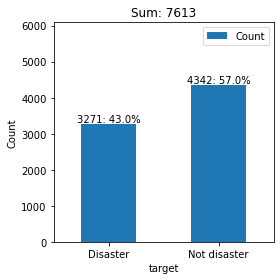

In [8]:
columnName = 'target'

#----------------------
def getCategoricalColumn(value):
    if value == 1: return "Disaster"
    else: return "Not disaster"
    
CategoricalColumn = data[columnName].apply(getCategoricalColumn)
CategoricalColumn.name = 'catTarget'

df = pd.concat([data, CategoricalColumn], axis=1)
#----------------------

groups = []
for group, subset in df.groupby(by=CategoricalColumn.name):
    groups.append({
        CategoricalColumn.name: group,
        'Count': len(subset)
    })

lenData = data[columnName].count()

dataCategoricalQuality = pd.DataFrame(groups)

fig, ax = plt.subplots(figsize=(4, 4))

dataCategoricalQuality.plot.bar(x=CategoricalColumn.name, ax=ax)

for i in range(len(groups)):
    value = str(groups[i]['Count'])+': '+str(np.round(groups[i]['Count']*100/lenData))+'%'
    ax.text(i, groups[i]['Count'], value , horizontalalignment='center', 
            verticalalignment='bottom')

ax.set_ylim(0, lenData - lenData/5)

ax.set_xlabel('target')
ax.set_ylabel('Count')
ax.set_title('Sum: '+ str(lenData) )
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### target vs keyword

In [9]:
data['keyword'] = data['keyword'].str.replace('%20', ' ')

In [10]:
columnNameA = 'target'
columnNameB = 'keyword'

crossTable = pd.crosstab(index=data[columnNameB],
                         columns=data[columnNameA],
                         margins=True)

crossTable.rename(columns={0 : 'Not disaster',1 : 'Disaster',}, inplace=True)

In [11]:
print('Most frequent Keywords for Disaster')
crossTable.sort_values(by='Disaster', ascending=False).head(10)

Most frequent Keywords for Disaster


target,Not disaster,Disaster,All
keyword,,,
All,4342,3271,7613
,19,42,61
derailment,0,39,39
wreckage,0,39,39
outbreak,1,39,40
typhoon,1,37,38
debris,0,37,37
oil spill,1,37,38
suicide bombing,1,32,33


In [12]:
print('Most frequent Keywords for Not disaster')
crossTable.sort_values(by='Not disaster', ascending=False).head(10)

Most frequent Keywords for Not disaster


target,Not disaster,Disaster,All
keyword,,,
All,4342,3271,7613
body bags,40,1,41
armageddon,37,5,42
harm,37,4,41
wrecked,36,3,39
ruin,36,1,37
deluge,36,6,42
fear,35,5,40
explode,35,3,38


#### target vs keyword length (character)

In [13]:
data['keywordLengthChar'] = data['keyword'].apply(len)

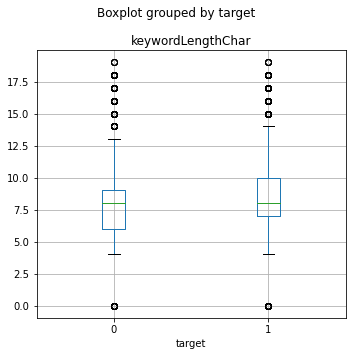

In [14]:
columnNameA = 'target'
columnNameB = 'keywordLengthChar'

ax = data.boxplot(by=columnNameA, column=columnNameB, figsize=(5, 5))
plt.tight_layout()
plt.show()

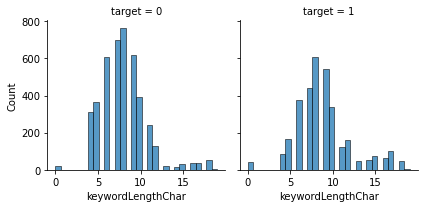

In [15]:
columnNameA = 'target'
columnNameB = 'keywordLengthChar'

g = sns.FacetGrid(data, col=columnNameA)
g.map(sns.histplot, columnNameB, bins=30)

Length of keyword can be a feature.

### target vs location

In [16]:
columnNameA = 'target'
columnNameB = 'location'

crossTable = pd.crosstab(index=data[columnNameB],
                         columns=data[columnNameA],
                         margins=True)

crossTable.rename(columns={0 : 'Not disaster',1 : 'Disaster',}, inplace=True)

In [17]:
print('Most frequent Locations for Disaster')
crossTable.sort_values(by='Disaster', ascending=False).head(10)

Most frequent Locations for Disaster


target,Not disaster,Disaster,All
location,,,
All,4342,3271,7613
,1458,1075,2533
USA,37,67,104
United States,23,27,50
Nigeria,6,22,28
India,4,20,24
Mumbai,3,19,22
UK,11,16,27
New York,55,16,71


In [18]:
print('Most frequent Locations for Not disaster')
crossTable.sort_values(by='Not disaster', ascending=False).head(10)

Most frequent Locations for Not disaster


target,Not disaster,Disaster,All
location,,,
All,4342,3271,7613
,1458,1075,2533
New York,55,16,71
USA,37,67,104
London,29,16,45
United States,23,27,50
"Los Angeles, CA",18,8,26
Canada,16,13,29
Kenya,15,5,20


### target vs text

#### Number of character (including space)

In [19]:
data['textLengthChar'] = data['text'].apply(len)

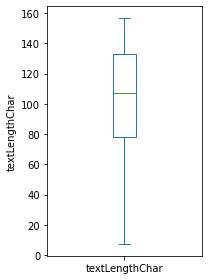

In [20]:
columnName = 'textLengthChar'

ax = (data[columnName]).plot.box(figsize=(3, 4))
ax.set_ylabel(columnName)

plt.tight_layout()
plt.show()

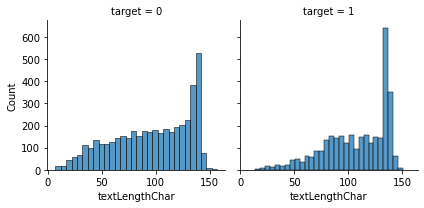

In [21]:
columnNameA = 'target'
columnNameB = 'textLengthChar'

g = sns.FacetGrid(data, col=columnNameA)
g.map(sns.histplot, columnNameB, bins=30)

Length of text can be a feature.

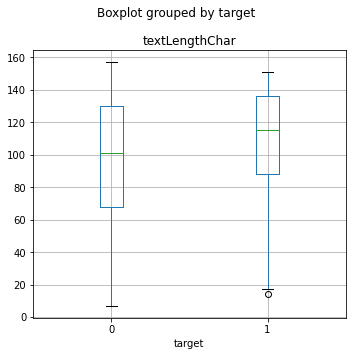

In [22]:
columnNameA = 'target'
columnNameB = 'textLengthChar'

ax = data.boxplot(by=columnNameA, column=columnNameB, figsize=(5, 5))
plt.tight_layout()
plt.show()

#### Number of words

In [23]:
def getWordTextLength(text):
    return len(text.split())
data['textLengthWord'] = data['text'].apply(getWordTextLength)

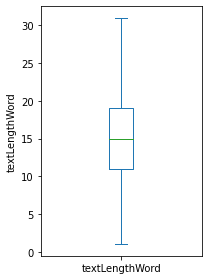

In [24]:
columnName = 'textLengthWord'

ax = (data[columnName]).plot.box(figsize=(3, 4))
ax.set_ylabel(columnName)

plt.tight_layout()
plt.show()

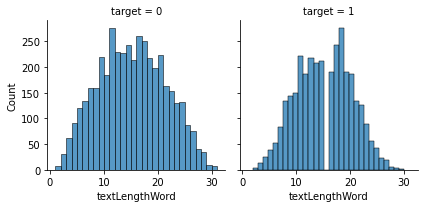

In [25]:
columnNameA = 'target'
columnNameB = 'textLengthWord'

g = sns.FacetGrid(data, col=columnNameA)
g.map(sns.histplot, columnNameB, bins=30)

Number of words in text can be a feature.

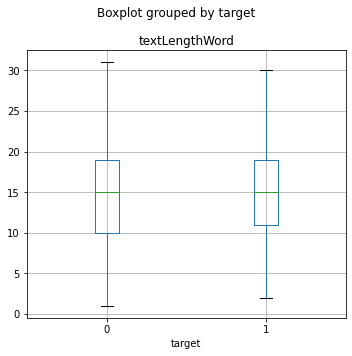

In [26]:
columnNameA = 'target'
columnNameB = 'textLengthWord'

ax = data.boxplot(by=columnNameA, column=columnNameB, figsize=(5, 5))
plt.tight_layout()
plt.show()

#### Link in text

In [27]:
pattern = r'(https?://\S+)'
data['link']= data["text"].str.extract(pattern)
    
data['containLink'] = data['link'].notna()

In [28]:
columnNameA = 'target'
columnNameB = 'containLink'

crossTable = pd.crosstab(index=data[columnNameB],
                         columns=data[columnNameA],
                         margins=True)

crossTable.rename(columns={0 : 'Not disaster',1 : 'Disaster',}, inplace=True)
crossTable.rename(index={False : 'No link',True : 'Link',}, inplace=True)

crossTable['Not disaster %'] = crossTable['Not disaster'] * 100 / crossTable['All']
crossTable['Disaster %'] = crossTable['Disaster'] * 100 / crossTable['All']

crossTable

target,Not disaster,Disaster,All,Not disaster %,Disaster %
containLink,,,,,
No link,2543,1099,3642,69.824272,30.175728
Link,1799,2172,3971,45.303450,54.696550
All,4342,3271,7613,57.034021,42.965979


Link in text can be a feature.

## Nan

In [29]:
dataNonNull = data.dropna()

In [30]:
print(f'{"Columns":15}: {"All":10} {"NonNull":10} {"%NonNull":10} {"Difference"}')
for idx, col in enumerate(data.columns):
    allValue = data.count()[idx]
    nonNullValue = dataNonNull.count()[idx]
    per = nonNullValue*100/allValue
    diff = allValue - nonNullValue
    print(f'{col:15}: {allValue} {nonNullValue:10} {np.round(per):10} {diff:10}')

Columns        : All        NonNull    %NonNull   Difference
keyword        : 7613       3971       52.0       3642
location       : 7613       3971       52.0       3642
text           : 7613       3971       52.0       3642
target         : 7613       3971       52.0       3642
keywordLengthChar: 7613       3971       52.0       3642
textLengthChar : 7613       3971       52.0       3642
textLengthWord : 7613       3971       52.0       3642
link           : 3971       3971      100.0          0
containLink    : 7613       3971       52.0       3642


# Preprocessing data with PyPark

In [3]:
#Create a connection
import pyspark as ps
from pyspark import SparkContext
try:
    sc.stop()
except:
    print('SparkContext is not created!')

sc = SparkContext(master = "local", appName = "App").getOrCreate()
print(sc, sc.version)

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
print(spark)

SparkContext is not created!
<SparkContext master=local appName=App> 3.2.0


In [4]:
dataset = spark.read.format('csv').options(header='true', inferSchema='true').load(dataPath)
dataset.show(5)

+---+-------+--------+--------------------+------+
| id|keyword|location|                text|target|
+---+-------+--------+--------------------+------+
|  1|   null|    null|Our Deeds are the...|     1|
|  4|   null|    null|Forest fire near ...|     1|
|  5|   null|    null|All residents ask...|     1|
|  6|   null|    null|13,000 people rec...|     1|
|  7|   null|    null|Just got sent thi...|     1|
+---+-------+--------+--------------------+------+
only showing top 5 rows



In [13]:
dataset.printSchema()

root
 |-- id: string (nullable = true)
 |-- keyword: string (nullable = true)
 |-- location: string (nullable = true)
 |-- text: string (nullable = true)
 |-- target: integer (nullable = true)



In [14]:
dataset.createOrReplaceTempView('data')
spark.catalog.listTables()

[Table(name='data', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]

In [15]:
dataTableNotNull = spark.sql("SELECT * FROM data WHERE keyword is not NULL and location is not NULL")

In [16]:
dataTableNotNull.count()

5080

### Preprocessing text

In [17]:
import pyspark.sql.functions as F

In [18]:
textColector = dataTableNotNull.select('text').collect()
for line in textColector[:5]:
    print(line['text'])

@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C
We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw
#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi
Crying out for more! Set me ablaze
On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N


Create column checking if there is a link

In [19]:
from pyspark.sql.types import IntegerType

pattern = r'(https?://\S+)'

dataTableNotNull = dataTableNotNull.withColumn("containLink", F.when(F.col("text").rlike(pattern),1).otherwise(0))

Create column without link

In [20]:
pattern = r'(https?://\S+)'

dataTableNotNull = dataTableNotNull.withColumn('textNoLink', F.regexp_replace(F.col('text'), pattern, ""))

Tokenizer: list of words and removing special characters

In [21]:
from pyspark.ml.feature import RegexTokenizer

dataTableNotNull = dataTableNotNull.drop('wordText')
dataTableNotNull = RegexTokenizer(inputCol="textNoLink", outputCol="wordText", pattern="\\W").transform(dataTableNotNull)

In [26]:
from pyspark.ml.feature import StopWordsRemover

locale = sc._jvm.java.util.Locale
locale.setDefault(locale.forLanguageTag("en-US"))

dataTableNotNull = dataTableNotNull.drop('wordTextNoSW')
dataTableNotNull= StopWordsRemover(inputCol="wordText", outputCol="wordTextNoSW").transform(dataTableNotNull)

### Preprocessing keyword and location

In [23]:
from pyspark.ml import Pipeline 
from pyspark.ml.feature import StringIndexer

# For mulitple columns
dataTableNotNull = dataTableNotNull.drop('keywordIndex')
dataTableNotNull = dataTableNotNull.drop('locationIndex')
indexers = [StringIndexer(inputCol=column, outputCol=column+"Index").fit(dataset) \
            for column in list(set(["keyword", "location"])) ]

pipeline = Pipeline(stages=indexers)

dataTableNotNull = pipeline.fit(dataTableNotNull).transform(dataTableNotNull)

In [32]:
from pyspark.ml.feature import Word2Vec

# Input data: Each row is a bag of words from a sentence or document.
documentDF = spark.createDataFrame([
    ("Hi I heard about Spark".split(" "), ),
    ("I wish Java could use case classes".split(" "), ),
    ("Logistic regression models are neat".split(" "), )
], ["text"])

# Learn a mapping from words to Vectors.
word2Vec = Word2Vec(vectorSize=3, minCount=0, inputCol="text", outputCol="result")
model = word2Vec.fit(documentDF)

result = model.transform(documentDF)
for row in result.collect():
    text, vector = row
    print("Text: [%s] => \nVector: %s\n" % (", ".join(text), str(vector)))

Text: [Hi, I, heard, about, Spark] => 
Vector: [0.03744278028607369,0.08412912115454674,0.04326651120209135]

Text: [I, wish, Java, could, use, case, classes] => 
Vector: [-0.031566000942673,0.027245925593888387,-0.018858169538101977]

Text: [Logistic, regression, models, are, neat] => 
Vector: [0.07543333768844605,0.04989021271467209,-0.023023459617979827]



In [33]:
documentDF.printSchema()

root
 |-- text: array (nullable = true)
 |    |-- element: string (containsNull = true)



In [34]:
result.printSchema()

root
 |-- text: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- result: vector (nullable = true)

